In [33]:
from os.path import join

import matplotlib.pyplot as plt
import os
import pandas as pd
import pathlib
import seaborn as sns
import tqdm

from config import CYCLE_GAN_DIR_RESULTS, SERENGETI_NIR_INCANDESCENT_DATASET_OUT
from evaluation.fid import calculate_fid

sns.set_theme()

pd.set_option('display.max_rows', 500)
plt.rcParams["figure.figsize"] = (16, 9)

In [2]:
CYCLE_GAN_RESULT_MATCHER = "*_fake.png"
CUT_RESULT_MATCHER = "fake_B/*.png"
DATASET_TESTB_MATCHER = "*.jpg"

NETWORK_NAME_MAP = {
    "CycleGAN (3e-5,9e-4)": "cycle_gan_serengeti_inc_0_00003_0_0009",
    "CycleGAN (3e-5,9e-5)": "cycle_gan_serengeti_inc_0_00003_0_00009",
    "CycleGAN (1.5e-5,4.5e-5)": "cycle_gan_serengeti_inc_0_000015_0_000045",
    "CycleGAN (3e-6,9e-5)": "cycle_gan_serengeti_inc_0_000003_0_00009",
    "CycleGAN (3e-6,9e-6)": "cycle_gan_serengeti_inc_0_000003_0_000009",
    "CUT (2e-3)": "cut_serengeti_inc_0_0002",
    "CUT (2e-4)": "cut_serengeti_inc_0_00002",
    "CUT (2e-5)": "cut_serengeti_inc_0_000002"
}


def map_epoch_name(name):
    name = name.removeprefix("test_")
    return int(name)


def map_network_name(name):
    if name in NETWORK_NAME_MAP.keys():
        return NETWORK_NAME_MAP[name]
    return name


DATASET_DIR = join(SERENGETI_NIR_INCANDESCENT_DATASET_OUT, "testB")

results = []


def get_matcher(network_name):
    if "cut" in network_name:
        return CUT_RESULT_MATCHER
    else:
        return CYCLE_GAN_RESULT_MATCHER


for network_name, network_dir_name in tqdm.tqdm(NETWORK_NAME_MAP.items(), "Processing networks"):
    network_dir = join(CYCLE_GAN_DIR_RESULTS, network_dir_name)
    for epoch_result in tqdm.tqdm(os.listdir(network_dir), f"Processing epochs of network \"{network_name}\""):
        epoch_result_dir = pathlib.Path(join(network_dir, epoch_result, "images"))

        matcher = get_matcher(network_dir_name)
        fid = calculate_fid(DATASET_DIR, epoch_result_dir, DATASET_TESTB_MATCHER, matcher)

        results.append([network_name, map_epoch_name(epoch_result), fid])

df = pd.DataFrame(results, columns=["network", "epoch", "FID"])
df

Processing networks:   0%|          | 0/8 [00:00<?, ?it/s]
Processing epochs of network CycleGAN (3e-5,9e-4):   0%|          | 0/5 [00:00<?, ?it/s]
Processing epochs of network CycleGAN (3e-5,9e-4):  20%|██        | 1/5 [00:08<00:32,  8.08s/it]
Processing epochs of network CycleGAN (3e-5,9e-4):  40%|████      | 2/5 [00:15<00:23,  7.97s/it]
Processing epochs of network CycleGAN (3e-5,9e-4):  60%|██████    | 3/5 [00:24<00:15,  8.00s/it]
Processing epochs of network CycleGAN (3e-5,9e-4):  80%|████████  | 4/5 [00:31<00:07,  7.99s/it]
Processing epochs of network CycleGAN (3e-5,9e-4): 100%|██████████| 5/5 [00:40<00:00,  8.04s/it]
Processing networks:  12%|█▎        | 1/8 [00:40<04:41, 40.20s/it]
Processing epochs of network CycleGAN (3e-5,9e-5):   0%|          | 0/5 [00:00<?, ?it/s]
Processing epochs of network CycleGAN (3e-5,9e-5):  20%|██        | 1/5 [00:08<00:33,  8.30s/it]
Processing epochs of network CycleGAN (3e-5,9e-5):  40%|████      | 2/5 [00:16<00:24,  8.20s/it]
Processing epochs

,network,epoch,FID
0,"CycleGAN (3e-5,9e-4)",80,117.825898
1,"CycleGAN (3e-5,9e-4)",120,114.998491
2,"CycleGAN (3e-5,9e-4)",40,117.502626
3,"CycleGAN (3e-5,9e-4)",160,110.039586
4,"CycleGAN (3e-5,9e-4)",200,108.096752
5,"CycleGAN (3e-5,9e-5)",80,123.332060
6,"CycleGAN (3e-5,9e-5)",120,110.338324
7,"CycleGAN (3e-5,9e-5)",40,118.986555
8,"CycleGAN (3e-5,9e-5)",160,107.367580
9,"CycleGAN (3e-5,9e-5)",200,111.731168


In [3]:
df.groupby(by=["network", "epoch"]).min()

FID
network                  epoch            
CUT (2e-3)               40     134.183551
                         80     122.523197
                         120    132.922317
                         160    115.301327
                         200    125.814455
                         240    136.199736
                         280    123.337228
                         320    114.359733
                         360    113.755007
                         400    109.889827
CUT (2e-4)               40     146.053682
                         80     127.608091
                         120    122.853913
                         160    134.283303
                         200    120.945404
                         240    111.090230
                         280    109.534138
                         320    123.074506
                         360    111.921193
                         400    111.983997
CUT (2e-5)               40     120.445825
                         80     117.355168
                         120    122.603944
                         160    112.238616
                         200    120.268550
                         240    114.435567
                         280    106.159049
                         320    112.550577
                         360    105.771042
                         400    104.134062
CycleGAN (1.5e-5,4.5e-5) 40     120.878570
                         80     111.202185
                         120    112.537392
                         160    107.480333
                         200    104.536387
CycleGAN (3e-5,9e-4)     40     117.502626
                         80     117.825898
                         120    114.998491
                         160    110.039586
                         200    108.096752
CycleGAN (3e-5,9e-5)     40     118.986555
                         80     123.332060
                         120    110.338324
                         160    107.367580
                         200    111.731168
CycleGAN (3e-6,9e-5)     40     225.478865
                         80     208.218554
                         120    202.246428
                         160    181.676414
                         200    187.745358
CycleGAN (3e-6,9e-6)     40     155.974506
                         80     129.258405
                         120    125.761099
                         160    120.520564
                         200    113.287551

In [15]:
df = df.sort_values(by=["network", "epoch"])
df

,network,epoch,FID
28,CUT (2e-3),40,134.183551
25,CUT (2e-3),80,122.523197
26,CUT (2e-3),120,132.922317
29,CUT (2e-3),160,115.301327
33,CUT (2e-3),200,125.814455
31,CUT (2e-3),240,136.199736
34,CUT (2e-3),280,123.337228
27,CUT (2e-3),320,114.359733
30,CUT (2e-3),360,113.755007
32,CUT (2e-3),400,109.889827


In [30]:
def plot_fid(df, networks):
    epoch_per_network_fid = df[df["network"].isin(networks)].groupby(by=["epoch", "network"]).min()
    epoch_per_network_fid = epoch_per_network_fid.sort_index()
    epoch_per_network_fid: pd.DataFrame = epoch_per_network_fid.reset_index()
    display(epoch_per_network_fid.sort_values("FID"))
    plt.title("FID per network per epoch")
    sns.barplot(x="epoch", y="FID", hue="network", data=epoch_per_network_fid, hue_order=networks)

,epoch,network,FID
29,400,CUT (2e-5),104.134062
26,360,CUT (2e-5),105.771042
20,280,CUT (2e-5),106.159049
19,280,CUT (2e-4),109.534138
27,400,CUT (2e-3),109.889827
16,240,CUT (2e-4),111.090230
25,360,CUT (2e-4),111.921193
28,400,CUT (2e-4),111.983997
11,160,CUT (2e-5),112.238616
23,320,CUT (2e-5),112.550577


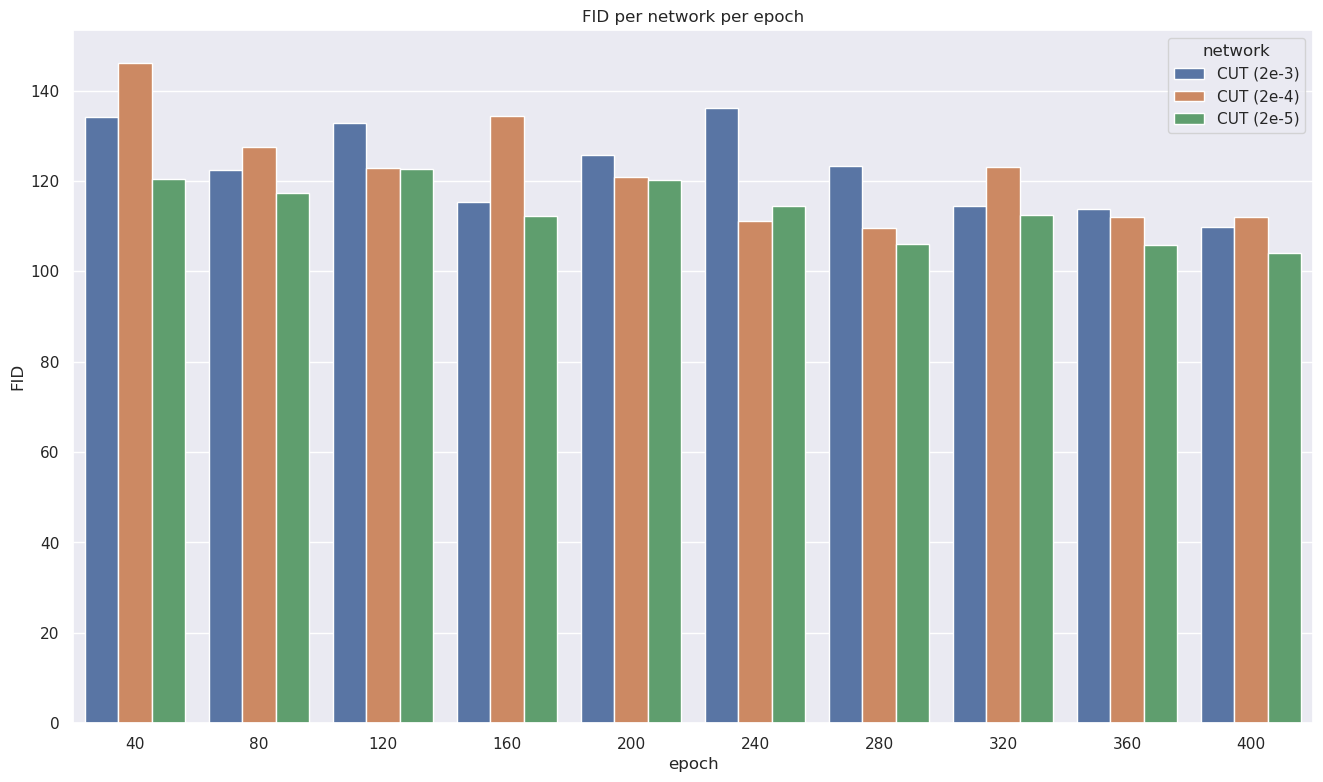

In [34]:
plot_fid(df, [
     "CUT (2e-3)", "CUT (2e-4)", "CUT (2e-5)"
 ])

,epoch,network,FID
20,200,"CycleGAN (1.5e-5,4.5e-5)",104.536387
17,160,"CycleGAN (3e-5,9e-5)",107.367580
15,160,"CycleGAN (1.5e-5,4.5e-5)",107.480333
21,200,"CycleGAN (3e-5,9e-4)",108.096752
16,160,"CycleGAN (3e-5,9e-4)",110.039586
12,120,"CycleGAN (3e-5,9e-5)",110.338324
5,80,"CycleGAN (1.5e-5,4.5e-5)",111.202185
22,200,"CycleGAN (3e-5,9e-5)",111.731168
10,120,"CycleGAN (1.5e-5,4.5e-5)",112.537392
24,200,"CycleGAN (3e-6,9e-6)",113.287551


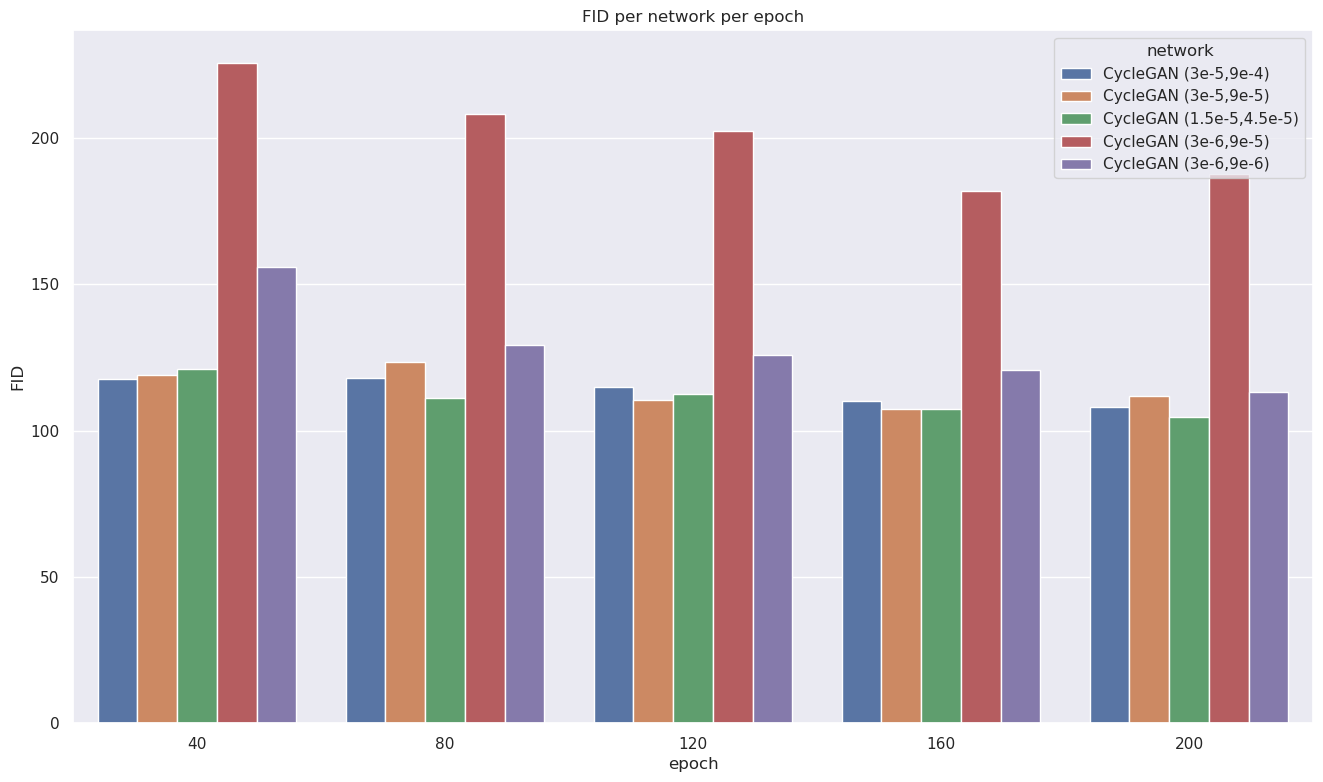

In [35]:
plot_fid(df, [
    "CycleGAN (3e-5,9e-4)",
    "CycleGAN (3e-5,9e-5)",
    "CycleGAN (1.5e-5,4.5e-5)",
    "CycleGAN (3e-6,9e-5)",
    "CycleGAN (3e-6,9e-6)"
])

,epoch,network,FID
14,400,CUT (2e-5),104.134062
9,200,"CycleGAN (1.5e-5,4.5e-5)",104.536387
13,360,CUT (2e-5),105.771042
11,280,CUT (2e-5),106.159049
7,160,"CycleGAN (1.5e-5,4.5e-5)",107.480333
3,80,"CycleGAN (1.5e-5,4.5e-5)",111.202185
6,160,CUT (2e-5),112.238616
5,120,"CycleGAN (1.5e-5,4.5e-5)",112.537392
12,320,CUT (2e-5),112.550577
10,240,CUT (2e-5),114.435567


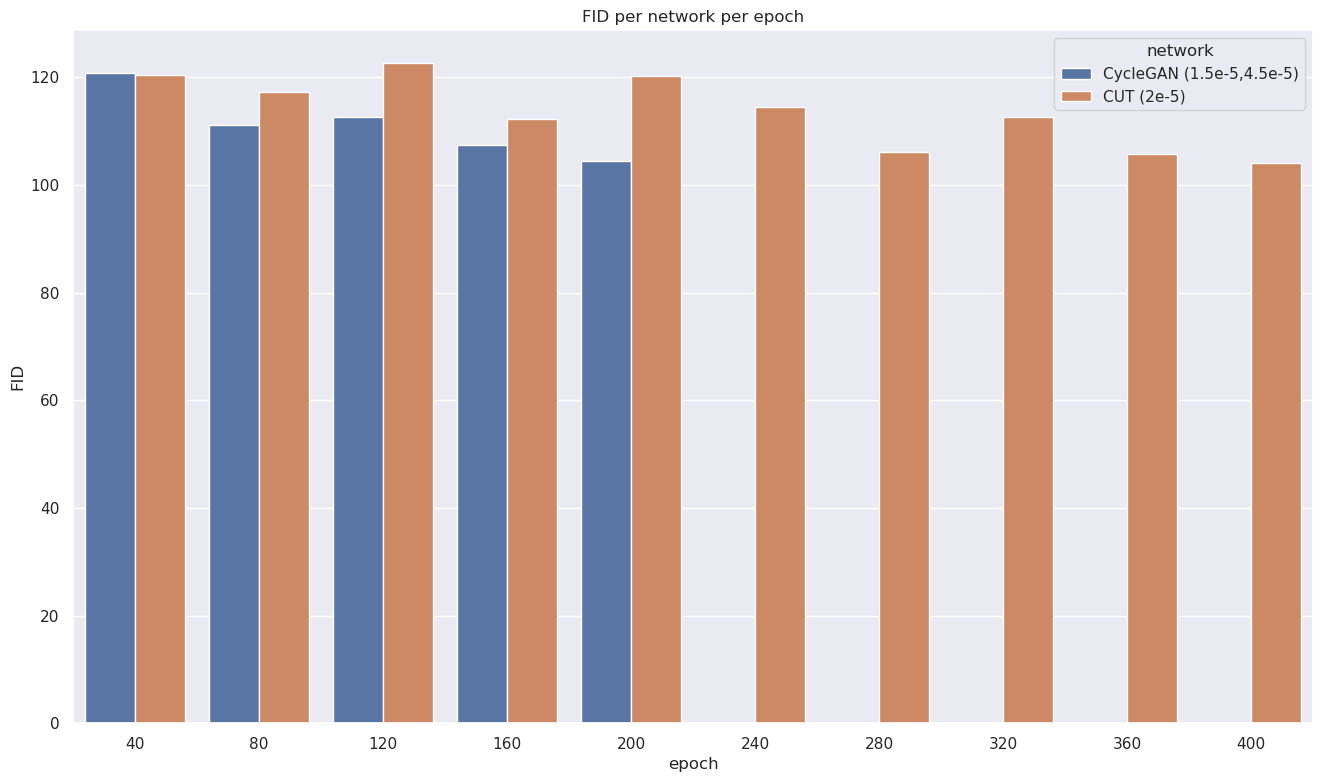

In [36]:
plot_fid(df, [
    "CycleGAN (1.5e-5,4.5e-5)",
    "CUT (2e-5)"
])